### Geo Spatial Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path ="/content/drive/MyDrive/Road_Accident_Aalysis_project/US_Accidents_March23.csv"
us_data = pd.read_csv(dataset_path,nrows=1000000)
us_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1000000 non-null  object 
 1   Source                 1000000 non-null  object 
 2   Severity               1000000 non-null  int64  
 3   Start_Time             1000000 non-null  object 
 4   End_Time               1000000 non-null  object 
 5   Start_Lat              1000000 non-null  float64
 6   Start_Lng              1000000 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1000000 non-null  float64
 10  Description            999999 non-null   object 
 11  Street                 998288 non-null   object 
 12  City                   999972 non-null   object 
 13  County                 1000000 non-null  object 
 14  State              

In [5]:
# Inspect geolocation columns
us_data[['Start_Lat', 'Start_Lng']].head()

,Start_Lat,Start_Lng
0,39.865147,-84.058723
1,39.928059,-82.831184
2,39.063148,-84.032608
3,39.747753,-84.205582
4,39.627781,-84.188354


In [6]:
# Drop rows with missing geolocation data
df_geo = us_data.dropna(subset=['Start_Lat', 'Start_Lng'])

# Remove duplicate geolocations if needed
df_geo = df_geo.drop_duplicates(subset=['Start_Lat', 'Start_Lng'])

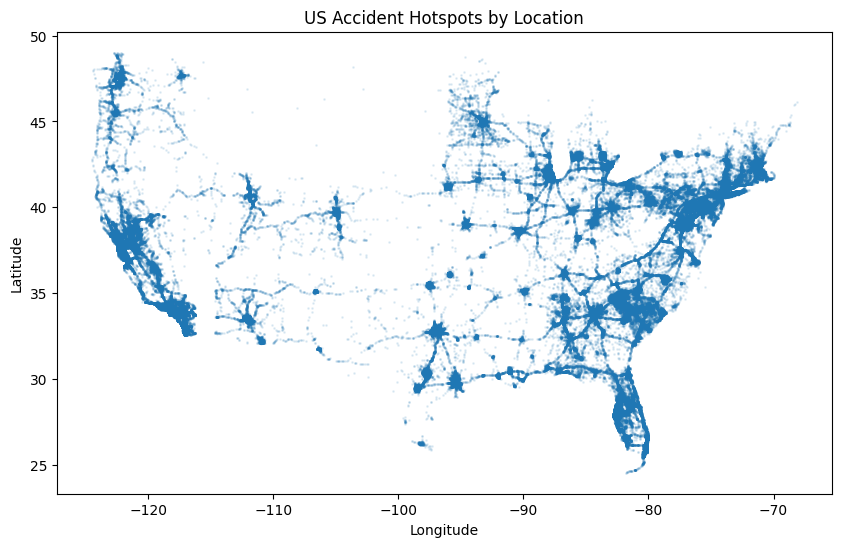

In [7]:
# Scatter plot for accident locations
plt.figure(figsize=(10, 6))
plt.scatter(df_geo['Start_Lng'], df_geo['Start_Lat'], alpha=0.1, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Accident Hotspots by Location')
plt.show()

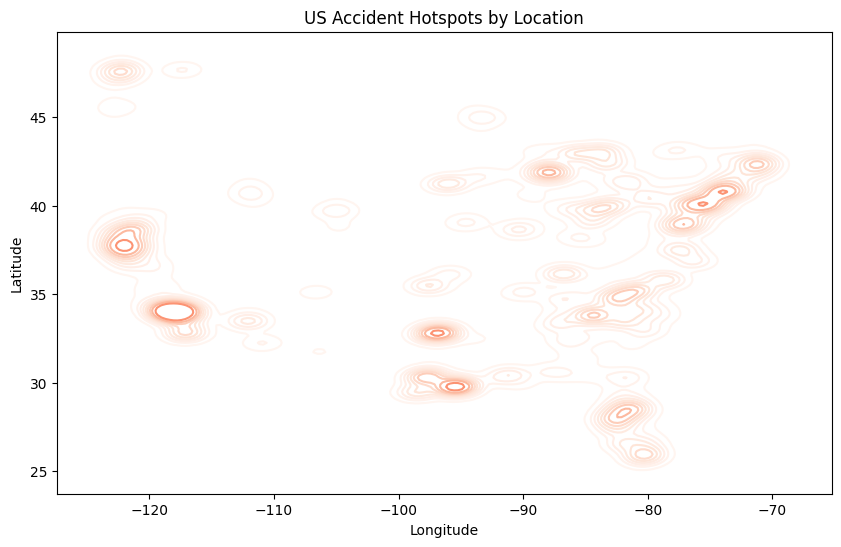

In [8]:
# Density plot using seaborn kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_geo,
    x = df_geo['Start_Lng'],
    y = df_geo['Start_Lat'],
    cmap="Reds",
    bw_adjust=0.5
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Accident Hotspots by Location')
plt.show()

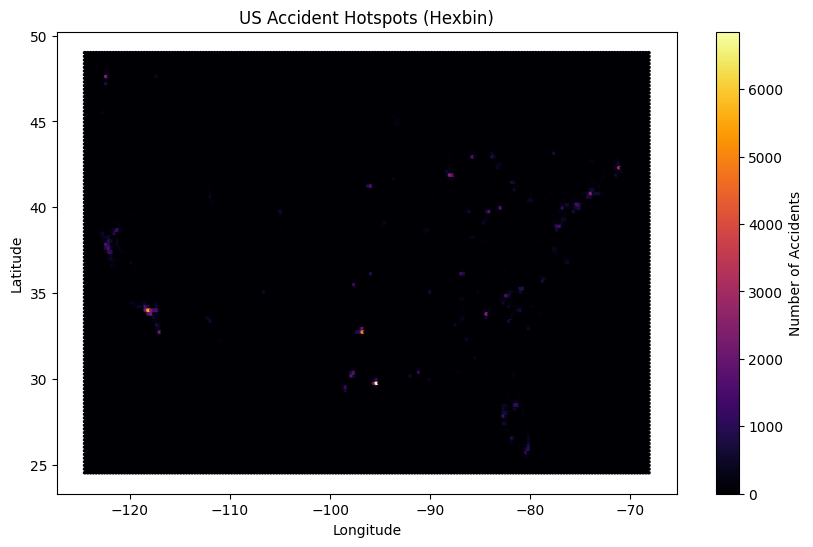

In [9]:
# Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df_geo['Start_Lng'], df_geo['Start_Lat'], gridsize=200, cmap='inferno')
plt.colorbar(label='Number of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Accident Hotspots (Hexbin)')
plt.show()


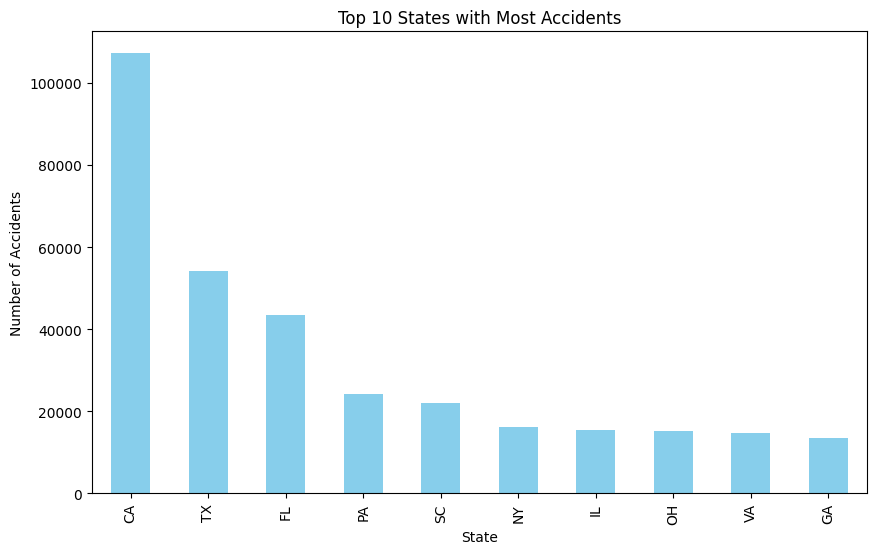

In [10]:
# 10 States with Most Accidents
top_states = df_geo['State'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Top 10 States with Most Accidents')
plt.show()
